In [1]:
from scipy.stats import norm
from scipy.stats import t
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt

__Q1:__ Call up the documentation for the `norm` function imported above. What is the second listed method?

Answer: the second from scipy.stat.norm is pdf 

__Q2:__ Use the method that generates random variates to draw five samples from the standard normal distribution.


In [2]:
answer=norm.rvs(0,1,5)
seed(47)
print(answer)

[ 0.1825944   1.52245852  0.47923795  1.40626978 -0.11880808]


__Q3:__ What is the mean of this sample? Is it exactly equal to the value you expected? Hint: the sample was drawn from the standard normal distribution.

In [3]:
mean=np.mean(answer)
print(mean)

0.6943505136087542


__Q4:__ What is the standard deviation of these numbers? Calculate this manually here as $\sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n}}$. Hint: np.sqrt() and np.sum() will be useful here and remember that numpy supports [broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

In [4]:
std=np.sqrt(np.sum((answer-mean)**2)/5)
print(std)

0.6575692423090892


__Q5:__ If all we had to go on was our five samples, what would be our best estimate of the population standard deviation? Use Bessel's correction ($n-1$ in the denominator), thus $\sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n-1}}$.

In [6]:
std2=std=np.sqrt(np.sum((answer-mean)**2)/4)
print(std2)

0.7351847628580771


__Q6:__ Now use numpy's std function to calculate the standard deviation of our random samples. Which of the above standard deviations did it return?

In [7]:
std3=np.std(answer)
std3

0.6575692423090892

__Q7:__ Consult the documentation for np.std() to see how to apply the correction for estimating the population parameter and verify this produces the expected result.

In [8]:
std4=np.std(answer,ddof=1)
std4

0.7351847628580771

__Q8:__ Simulate performing this random trial every day for a year, calculating the mean of each daily sample of 10, and plot the resultant sampling distribution of the mean.

(array([ 1.,  0.,  1.,  1.,  1.,  0., 12.,  8., 14., 23., 22., 31., 26.,
        37., 41., 30., 27., 23., 21., 16., 11., 10.,  4.,  2.,  2.,  0.,
         0.,  0.,  0.,  1.]),
 array([166.58906962, 166.97472323, 167.36037684, 167.74603046,
        168.13168407, 168.51733768, 168.90299129, 169.2886449 ,
        169.67429852, 170.05995213, 170.44560574, 170.83125935,
        171.21691296, 171.60256658, 171.98822019, 172.3738738 ,
        172.75952741, 173.14518103, 173.53083464, 173.91648825,
        174.30214186, 174.68779547, 175.07344909, 175.4591027 ,
        175.84475631, 176.23040992, 176.61606353, 177.00171715,
        177.38737076, 177.77302437, 178.15867798]),
 <a list of 30 Patch objects>)

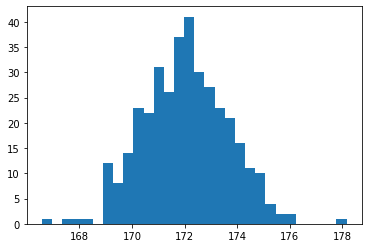

In [10]:
#Q8: Simulate performing this random trial every day for a year, calculating the mean of each daily sample of 10, and plot the resultant sampling distribution of the mean.
seed(47)
pop_heights = norm.rvs(172, 5, size=50000)
def townsfolk_sampler(n):
    return np.random.choice(pop_heights, n)
list=[]
for i in range(365):
    daily_sample=townsfolk_sampler(10)
    list.append(np.mean(daily_sample))
plt.hist(list,bins=30)

__Q9:__ Verify the above results from the CLT.

In [11]:
std5=np.std(list)
std5

1.590245247149885

__Q10:__ Repeat the above year's worth of samples but for a sample size of 50 (perhaps you had a bigger budget for conducting surveys that year!) Would you expect your distribution of sample means to be wider (more variable) or narrower (more consistent)? Compare your resultant summary statistics to those predicted by the CLT.

172.08933066178827

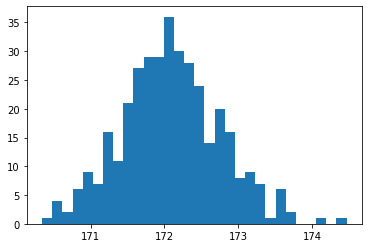

In [12]:
list2=[]
for i in range(365):
    daily_sample=townsfolk_sampler(50)
    list2.append(np.mean(daily_sample))
plt.hist(list2,bins=30)
mean2=np.mean(list2)
mean2

Recall some basic properties of the standard Normal distribution, such as about 68% of observations being within plus or minus 1 standard deviation of the mean.

__Q11:__ Using this fact, calculate the probability of observing the value 1 or less in a single observation from the standard normal distribution. Hint: you may find it helpful to sketch the standard normal distribution (the familiar bell shape) and mark the number of standard deviations from the mean on the x-axis and shade the regions of the curve that contain certain percentages of the population.

In [13]:
answer=34+34+13.5+2.5
print(str(answer)+'%')

84.0%


__Q12:__ Use the cdf() function to answer the question above again and verify you get the same answer.

In [14]:
norm.cdf(1,0,1)

0.8413447460685429

__Q13:__ Using our knowledge of the population parameters for our townsfolk's heights, what is the probability of selecting one person at random and their height being 177 cm or less? Calculate this using both of the approaches given above.

In [17]:
method1=norm.cdf(177,np.mean(pop_heights),np.std(pop_heights))
method2=34+34+13.5+2.5
print(str(method1*100)+'%',method2)

84.08546025640734% 84.0


__Q14:__ Turning this question around. Let's say we randomly pick one person and measure their height and find they are 2.00 m tall? How surprised should we be at this result, given what we know about the population distribution? In other words, how likely would it be to obtain a value at least as extreme as this? Express this as a probability.

In [16]:
print(str(100-84)+'%')

16%


__Q15:__ Let's now start from the position of knowing nothing about the heights of people in our town.
* Use our favorite random seed of 47, to randomly sample the heights of 50 townsfolk
* Estimate the population mean using np.mean
* Estimate the population standard deviation using np.std (remember which denominator to use!)
* Calculate the (95%) [margin of error](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/hypothesis-testing/margin-of-error/#WhatMofE) (use the exact critial z value to 2 decimal places - [look this up](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/find-critical-values/) or use norm.ppf())
* Calculate the 95% Confidence Interval of the mean
* Does this interval include the true population mean?

In [24]:
seed(47)
samples=norm.rvs(172, 5, size=50)
mean3=np.mean(samples)
std7=np.std(samples)
margin=1.96*(std7/np.sqrt(50))
CI=(mean3-margin, mean3+margin)
print('Mean='+str(mean3),'Standard Deviation='+str(std7),'Margin of Error='+str(margin),'Confidence Interval='+str(CI))

Mean=171.09434218281885 Standard Deviation=4.8195454412634975 Margin of Error=1.3359098393916191 Confidence Interval=(169.75843234342722, 172.43025202221048)


Answer: The confidence interval tells us we are 95% positive that the true population mean is included in the confidence interval

__Q16:__ Above we calculated the confidence interval using the critical z value. What is the problem with this? What requirement, or requirements, are we (strictly) failing?

z-test is used to calculate the confidence interval so we can compare to  the null hypothesis. Since there is no null hypothesis we can not reject or accept anything here. We ca 

__Q17:__ Calculate the 95% confidence interval for the mean using the _t_ distribution. Is this wider or narrower than that based on the normal distribution above? If you're unsure, you may find this [resource](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/confidence-interval/) useful. For calculating the critical value, remember how you could calculate this for the normal distribution using norm.ppf().

In [29]:
margin2=1.671*(std7/np.sqrt(50))
CI2=(mean3-margin2,mean3+margin2)
CV=norm.ppf(0.95,mean3,std7)
print(CI2,CV)

(169.95541088607223, 172.23327347956547) 179.02178898213856
